In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


In [4]:
train_sample = train.copy()
test_sample = test.copy()

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.shape

(8523, 12)

In [9]:
categorical_col = []
for column in train.columns:
    if train[column].dtype == object and len(train[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {train[column].unique()}")
        print("====================================")

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' nan 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
numerical_col = []
for column in train.columns:
    if train[column].dtype != object and len(train[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {train[column].unique()}")
        print("====================================")

Outlet_Establishment_Year : [1999 2009 1998 1987 1985 2002 2007 1997 2004]


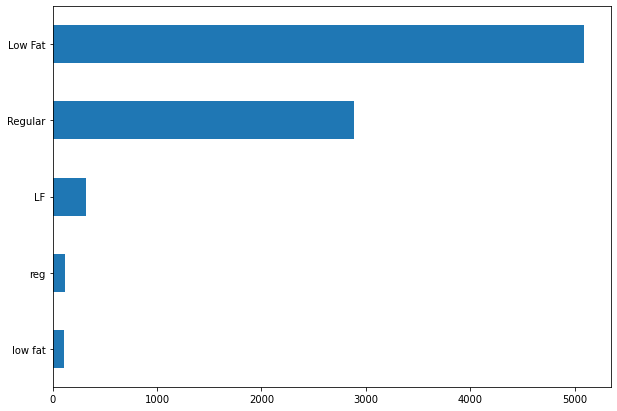

In [11]:
plt.figure(figsize=(10,7))
train.Item_Fat_Content.value_counts().sort_values(ascending=True).plot(kind='barh')

In [12]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Text(0, 0.5, 'ITEM TYPE')

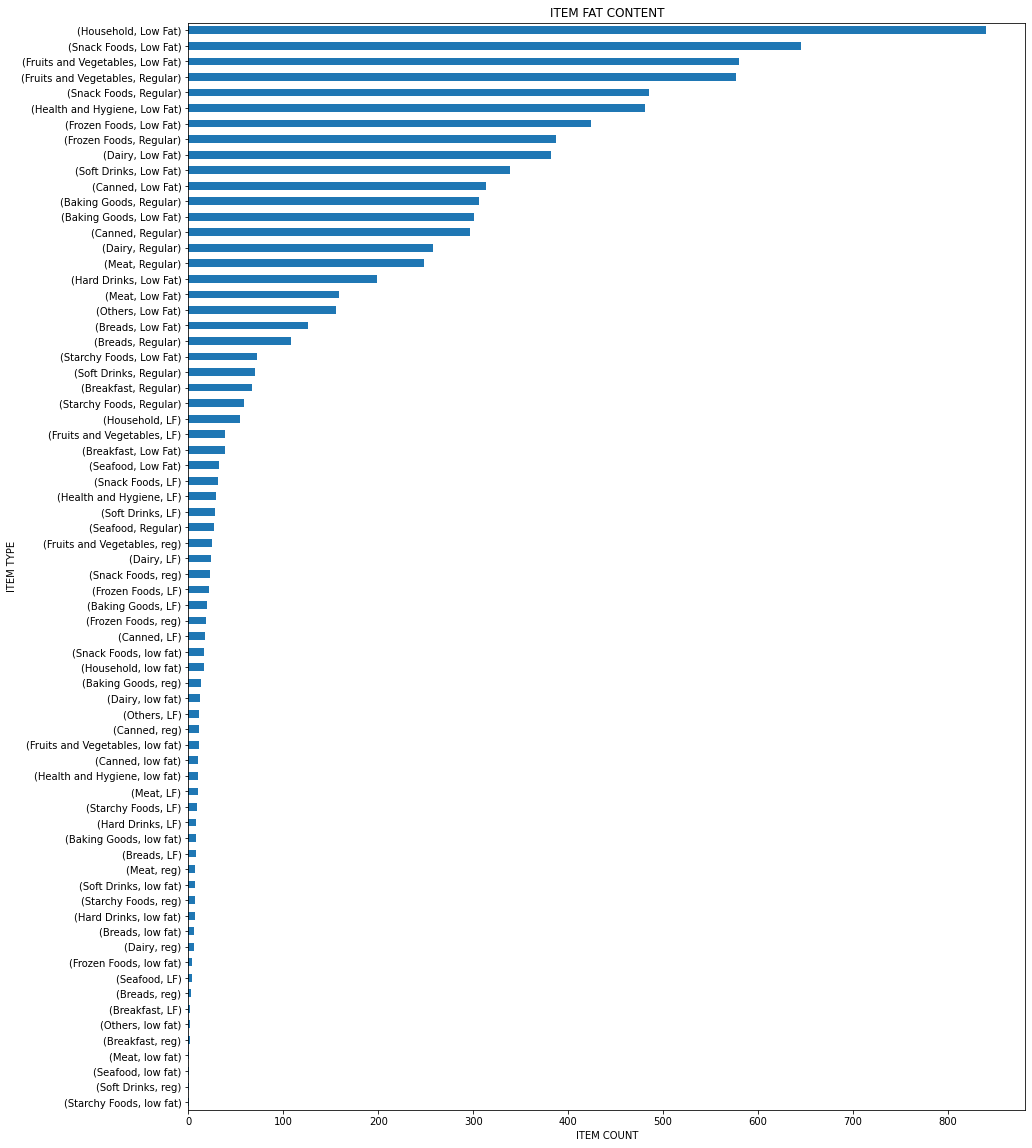

In [13]:
plt.figure(figsize=(15,20))
train.groupby('Item_Type')['Item_Fat_Content'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('ITEM FAT CONTENT')
plt.xlabel('ITEM COUNT')
plt.ylabel('ITEM TYPE')

In [14]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

In [16]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
fig = px.scatter(train, x='Outlet_Type', y='Item_Outlet_Sales', color='Item_Fat_Content') # Added color to previous basic 
fig.update_layout(title='Sales Price Vs Area with Shape',xaxis_title="Area",yaxis_title="Price")
fig.show()

In [18]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

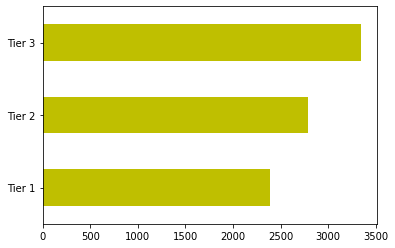

In [19]:
train.Outlet_Location_Type.value_counts().sort_values(ascending=True).plot(kind='barh', color='y')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

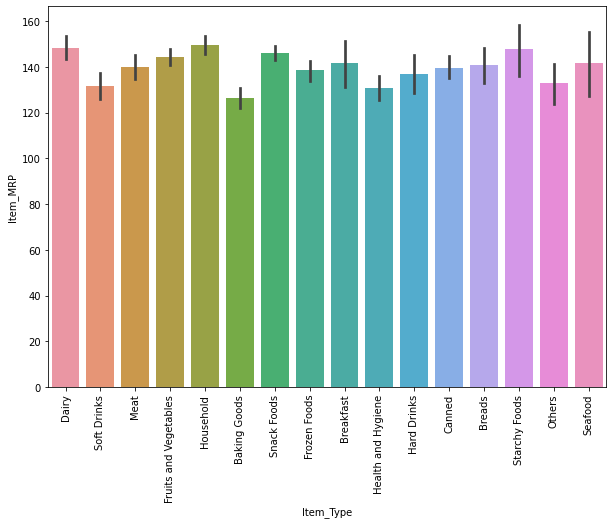

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Item_Type', y = 'Item_MRP', data=train)
plt.xticks(rotation=90)

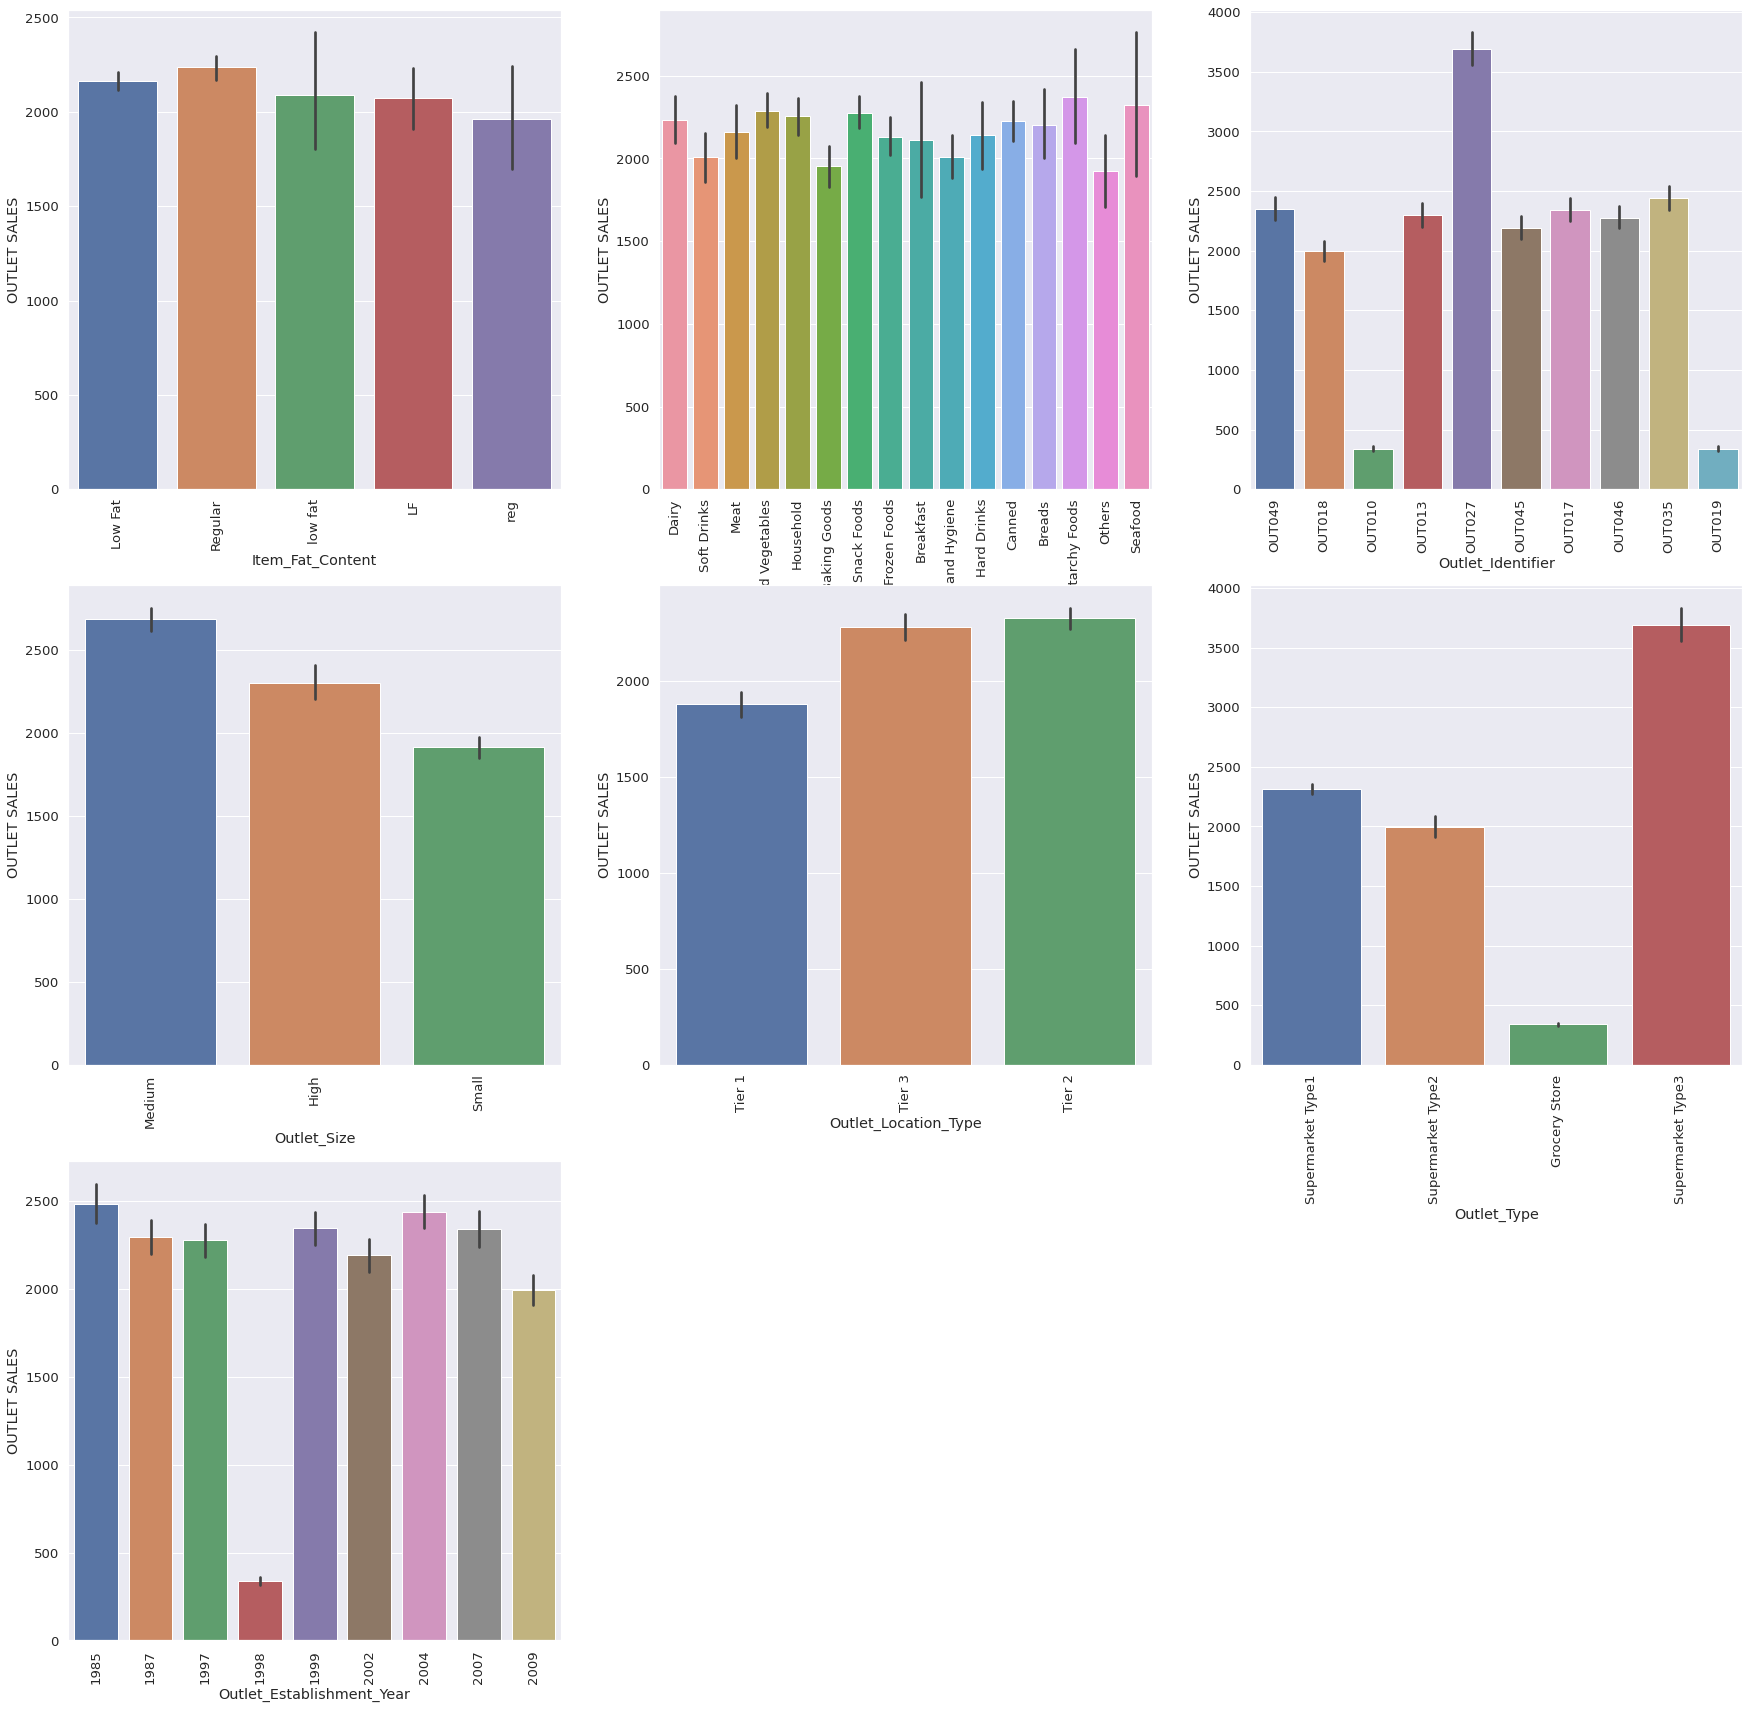

In [21]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Item_Outlet_Sales', data=train)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('OUTLET SALES')
    plt.xlabel(f'{column}')

In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



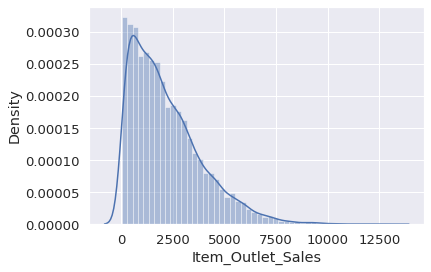

In [23]:
sns.distplot(train['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



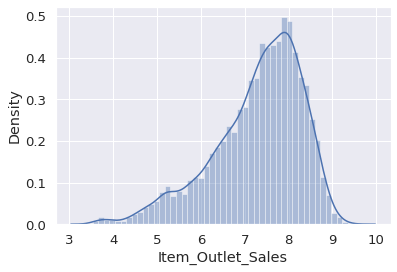

In [24]:
train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'] +1)
sns.distplot(train['Item_Outlet_Sales'])

In [25]:
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

In [26]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
Item_Fat_Content = train[['Item_Fat_Content']]

Item_Fat_Content = pd.get_dummies(Item_Fat_Content, drop_first = True)

In [28]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [29]:
Item_Type = train[['Item_Type']]

Item_Type = pd.get_dummies(Item_Type, drop_first = True)

In [30]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Medium' : 0, 'Small' : 1, 'High' : 2})

In [32]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.0,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.0,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.0,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,6.903451


In [33]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [34]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map({'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2})

In [35]:
train['Outlet_Type'] = train['Outlet_Type'].map({'Grocery Store' : 0, 'Supermarket Type1' : 1, 
                                                 'Supermarket Type2 ' : 2, 'Supermarket Type3' : 3})

In [36]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,0.0,0,1.0,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,0.0,2,NaN,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,0.0,0,1.0,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,0.0,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,2.0,2,1.0,6.903451


In [37]:
train.drop(['Item_Type','Item_Identifier','Item_Fat_Content','Outlet_Identifier'], axis=1, inplace=True)

In [38]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,0.0,0,1.0,8.225808
1,5.92,0.019278,48.2692,2009,0.0,2,NaN,6.096776
2,17.50,0.016760,141.6180,1999,0.0,0,1.0,7.648868
3,19.20,0.000000,182.0950,1998,NaN,2,0.0,6.597664
4,8.93,0.000000,53.8614,1987,2.0,2,1.0,6.903451


In [39]:
train =  pd.concat([train, Item_Fat_Content, Item_Type], axis = 1)

In [40]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,0.0,0,1.0,8.225808,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0.0,2,NaN,6.096776,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0.0,0,1.0,7.648868,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,NaN,2,0.0,6.597664,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,2.0,2,1.0,6.903451,1,0,...,0,0,0,1,0,0,0,0,0,0


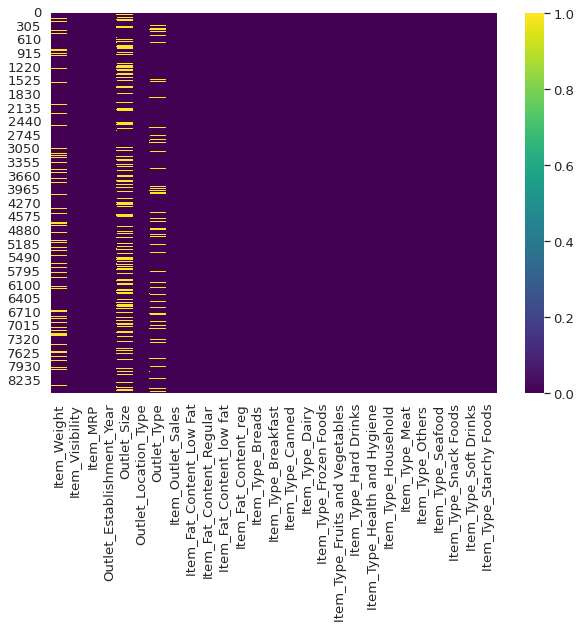

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), cmap='viridis')

In [42]:
missing_values = [feature for feature in train.columns if train[feature].isnull().sum() >1]
print("The features having the missing values are",missing_values,end='')

The features having the missing values are ['Item_Weight', 'Outlet_Size', 'Outlet_Type']

In [43]:
for feature in missing_values:
    print(feature, 'has', np.round(train[feature].isnull().mean(),2), '% of missing values')

Item_Weight has 0.17 % of missing values
Outlet_Size has 0.28 % of missing values
Outlet_Type has 0.11 % of missing values


In [44]:
train.Item_Weight.mean()

12.857645184135976

In [45]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [46]:
train.Outlet_Size.value_counts()

0.0    2793
1.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [47]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].median())

In [48]:
train.Outlet_Type.value_counts()

1.0    5577
0.0    1083
3.0     935
Name: Outlet_Type, dtype: int64

In [49]:
train['Outlet_Type'] = train['Outlet_Type'].fillna(train['Outlet_Type'].median())

In [50]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,0.0,0,1.0,8.225808,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0.0,2,1.0,6.096776,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0.0,0,1.0,7.648868,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,1.0,2,0.0,6.597664,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,2.0,2,1.0,6.903451,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,0.0,0,1.0,8.225808,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0.0,2,1.0,6.096776,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0.0,0,1.0,7.648868,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,1.0,2,0.0,6.597664,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,2.0,2,1.0,6.903451,1,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
Item_Type = test[['Item_Type']]

Item_Type = pd.get_dummies(Item_Type, drop_first = True)

Item_Fat_Content = test[['Item_Fat_Content']]

Item_Fat_Content = pd.get_dummies(Item_Fat_Content, drop_first = True)

test['Outlet_Size'] = test['Outlet_Size'].map({'Medium' : 0, 'Small' : 1, 'High' : 2})

test['Outlet_Location_Type'] = test['Outlet_Location_Type'].map({'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2})

test['Outlet_Type'] = test['Outlet_Type'].map({'Grocery Store' : 0, 'Supermarket Type1' : 1, 
                                                 'Supermarket Type2 ' : 2, 'Supermarket Type3' : 3})

test.drop(['Item_Type','Item_Identifier','Item_Fat_Content','Outlet_Identifier'], axis=1, inplace=True)

test =  pd.concat([test, Item_Fat_Content, Item_Type], axis = 1)

In [54]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750,0.007565,107.8622,1999,0.0,0,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,NaN,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600,0.099575,241.7538,1998,NaN,2,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315,0.015388,155.0340,2007,NaN,1,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,0.118599,234.2300,1985,0.0,2,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].median())

test['Outlet_Type'] = test['Outlet_Type'].fillna(test['Outlet_Type'].median())

In [56]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0.007565,107.8622,1999,0.0,0,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1.0,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,1.0,2,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0.015388,155.0340,2007,1.0,1,1.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0.0,2,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test.shape

(5681, 26)

In [58]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,0.0,0,1.0,8.225808,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,0.0,2,1.0,6.096776,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0.0,0,1.0,7.648868,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,1.0,2,0.0,6.597664,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,2.0,2,1.0,6.903451,1,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [60]:
x = train.drop(['Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

X_test = test

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [62]:
import xgboost as xgb

xg_boost = xgb.XGBRegressor()

xg_boost.fit(x_train, y_train)

[11:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [63]:
xg_boost_pred = xg_boost.predict(x_val)

In [77]:
xgb_r2 = r2_score(y_val,xg_boost_pred)
print('R-Square Score: ',xgb_r2*100)

# Calculate the absolute errors
xgb_errors = abs(xg_boost_pred - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xg_boost_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (xgb_errors / y_val)
# Calculate and display accuracy
xgb_accuracy = 100 - np.mean(mape)
acc_xgb=round(xgb_accuracy, 2)
print('Accuracy for XGboost regressor is :', acc_xgb, '%.')

R-Square Score:  74.1550536119781
Mean Absolute Error: 7.28 degrees.
Accuracy for XGboost regressor is : 94.08 %.


In [78]:
xgb_mse=metrics.mean_squared_error(y_val, xg_boost_pred)
print('mse:',xgb_mse)
xgb_mae=metrics.mean_absolute_error(y_val, xg_boost_pred)
print('mae:',xgb_mae)
xg_rms = sqrt(mean_squared_error(y_val, xg_boost_pred))
print("rmse:", xg_rms)

mse: 0.2739993895054564
mae: 0.4025561716109839
rmse: 0.5234495099868338


In [67]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
dtree_pred = dtree.predict(x_val)

In [79]:
dtr_r2 = r2_score(y_val,dtree_pred)
print('R-Square Score: ',dtr_r2*100)

R-Square Score:  44.44934138345036


In [71]:
dtree_errors = abs(dtree_pred - y_val)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_errors / y_val)
# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
acc_dtr=round(dtree_accuracy, 2)
print('Accuracy for Decision tree regressor is :', acc_dtr, '%.')

Mean Absolute Error: 7.27 degrees.
Accuracy for Decision tree regressor is : 91.42 %.


In [80]:
dtr_mse=metrics.mean_squared_error(y_val, dtree_pred)
print('mse:',metrics.mean_squared_error(y_val, dtree_pred))
dtr_mae=metrics.mean_absolute_error(y_val, dtree_pred)
print('mae:',metrics.mean_absolute_error(y_val, dtree_pred))
dtree_rms = sqrt(mean_squared_error(y_val, dtree_pred))
print("rmse:", dtree_rms)

mse: 0.5889293140346725
mae: 0.5935065052792955
rmse: 0.7674173011046027


In [81]:
rmse_score = pd.DataFrame({'Algorithms' : [ 'decision tree', 'xgboost'],
                          'RMSE score' : [ dtree_rms,  xg_rms]})
rmse_score

,Algorithms,RMSE score
0,decision tree,0.767417
1,xgboost,0.523450


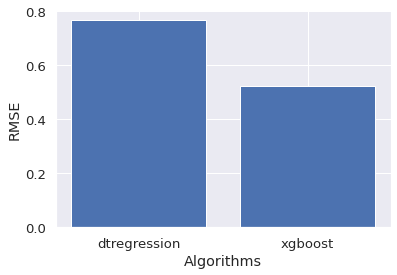

In [93]:
plt.bar(['dtregression','xgboost'],[dtree_rms,xg_rms])
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.show()

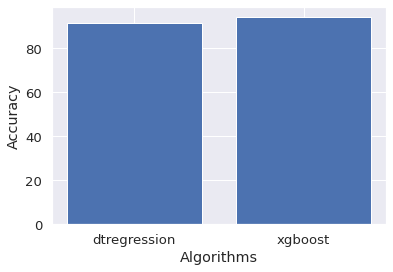

In [94]:
plt.bar(['dtregression','xgboost'],[acc_dtr,acc_xgb])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

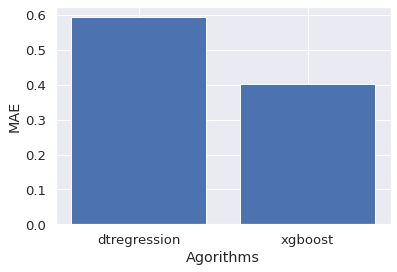

In [95]:
plt.bar(['dtregression','xgboost'],[dtr_mae,xgb_mae])
plt.xlabel("Agorithms")
plt.ylabel("MAE")
plt.show()

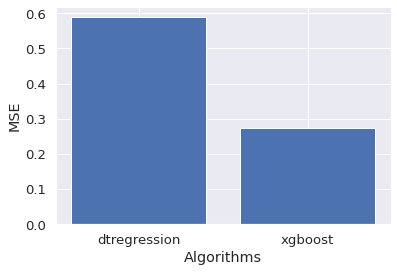

In [96]:
plt.bar(['dtregression','xgboost'],[dtr_mse,xgb_mse])
plt.xlabel("Algorithms")
plt.ylabel("MSE")
plt.show()

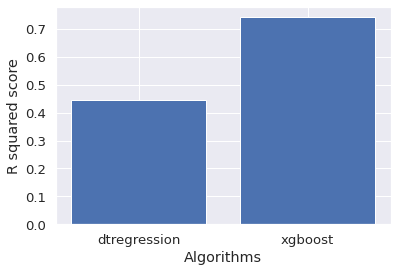

In [97]:
plt.bar(["dtregression","xgboost"],[dtr_r2,xgb_r2])
plt.xlabel("Algorithms")
plt.ylabel("R squared score")
plt.show()